In [35]:
import pandas as pd

df = pd.read_csv("../data/youtoxic_english_1000.csv")

df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


In [37]:
for col in df.columns:
    print(f"Columna: {col}")
    print(f"Valores únicos: {df[col].nunique()}")
    print(f"Valores nulos: {df[col].isnull().sum()}")
    print("------------------------")

Columna: CommentId
Valores únicos: 1000
Valores nulos: 0
------------------------
Columna: VideoId
Valores únicos: 13
Valores nulos: 0
------------------------
Columna: Text
Valores únicos: 997
Valores nulos: 0
------------------------
Columna: IsToxic
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsAbusive
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsThreat
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsProvocative
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsObscene
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsHatespeech
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsRacist
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsNationalist
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsSexist
Valores únicos: 2
Valores nulos: 0
------------------------
Columna: IsHomophobic
Valores únicos: 1
Valores

In [38]:
df.duplicated().sum()

np.int64(0)

In [39]:
# ver si hay duplicados basados en la columna "Text"
df[df.duplicated(subset=["Text"])]

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
657,UgxXtUmfp0rdwXB8qld4AaABAg,cT14IbTDW2c,run them over,True,True,False,True,False,False,False,False,False,False,False,False
677,UgyjhPsMlWKlFNmG-h94AaABAg,cT14IbTDW2c,run them over,True,True,False,True,False,False,False,False,False,False,False,False
699,UgzFZGnqcjZcW7wejI54AaABAg,cT14IbTDW2c,RUN THEM OVER,True,True,False,True,False,False,False,False,False,False,False,False


In [40]:
# eliminamos duplicados basados en la columna "Text" dejando el primero
df = df.drop_duplicates(subset=["Text"], keep="first")

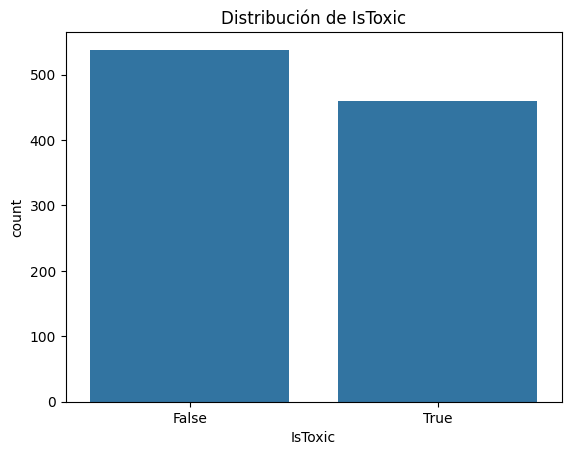

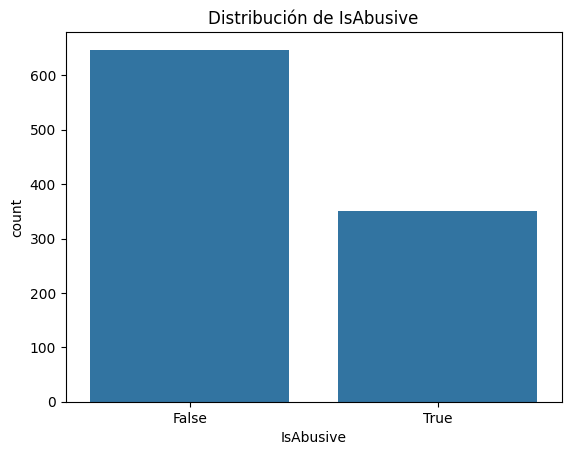

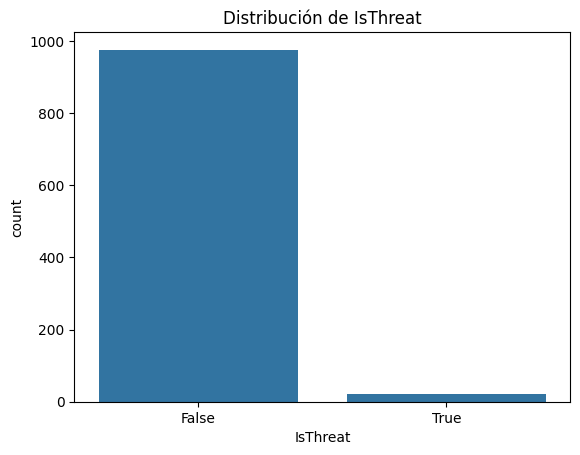

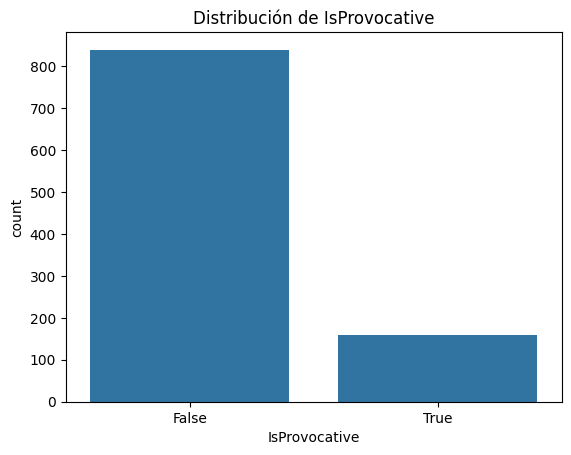

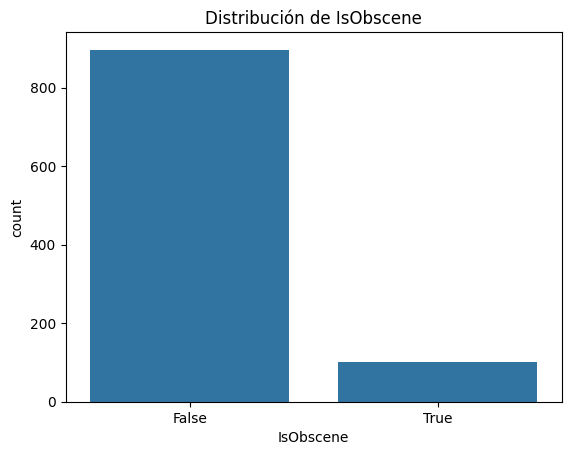

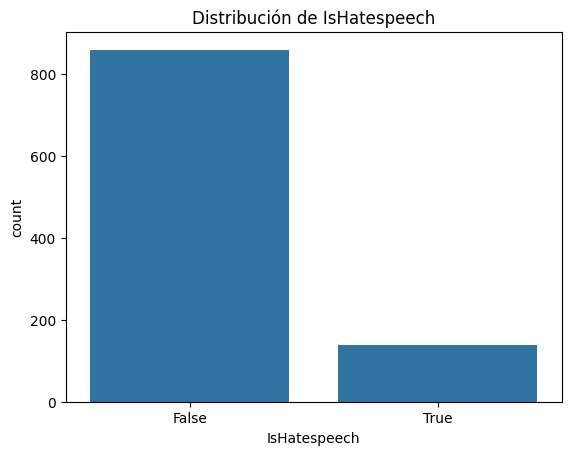

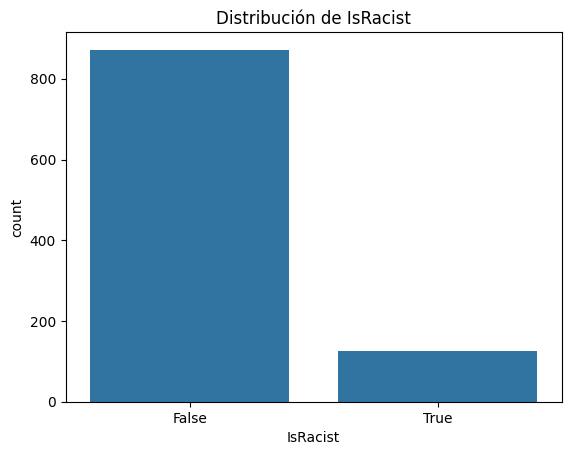

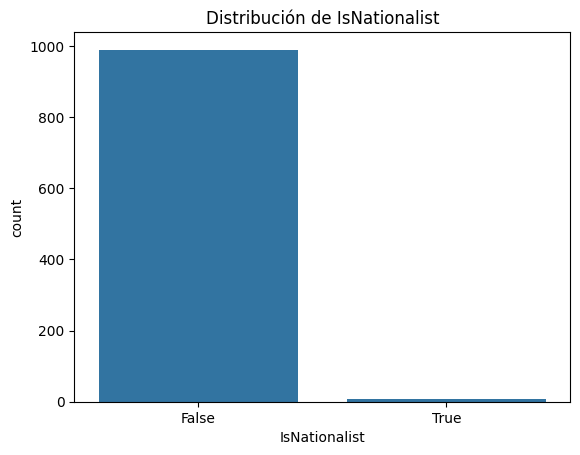

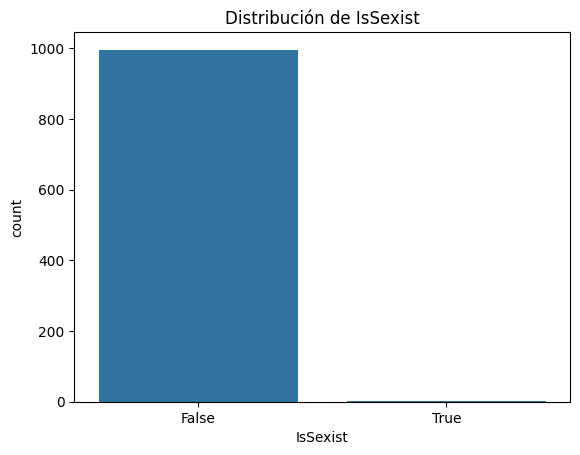

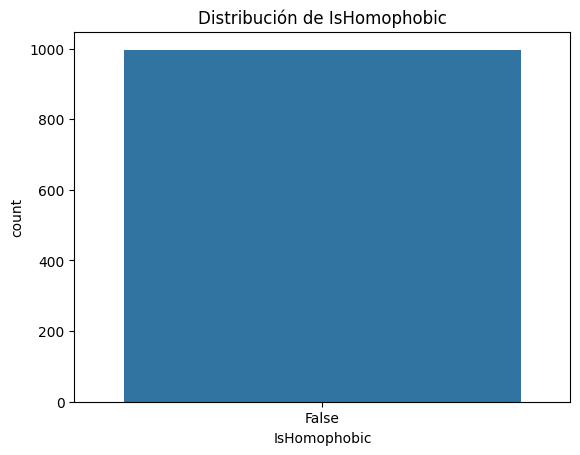

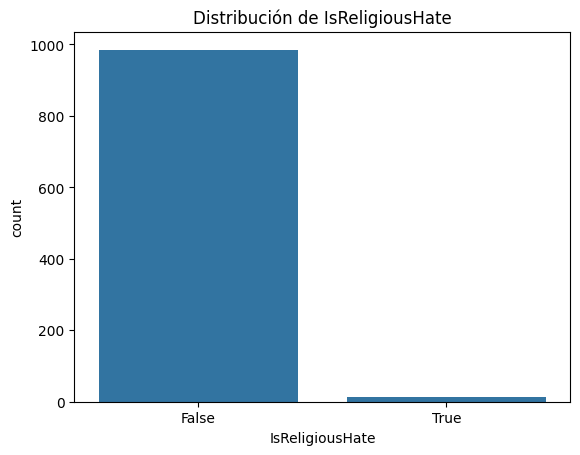

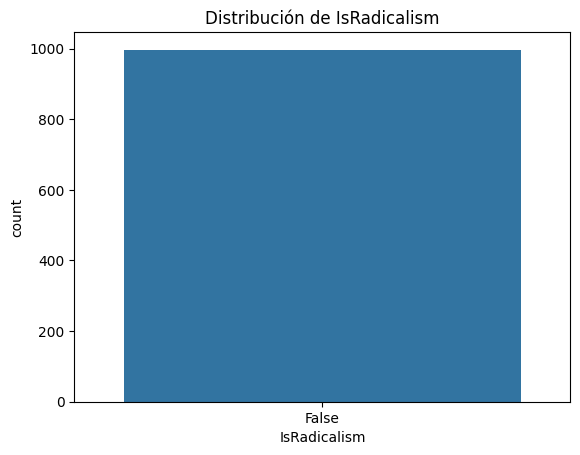

In [41]:
# Distribución de etiquetas binarias
import seaborn as sns
import matplotlib.pyplot as plt

binary_columns = ["IsToxic", "IsAbusive", "IsThreat", "IsProvocative", "IsObscene", "IsHatespeech", "IsRacist", "IsNationalist", "IsSexist", "IsHomophobic", "IsReligiousHate",	"IsRadicalism"]

for col in binary_columns:
    sns.countplot(x=col, data=df)
    plt.title(f'Distribución de {col}')
    plt.show()


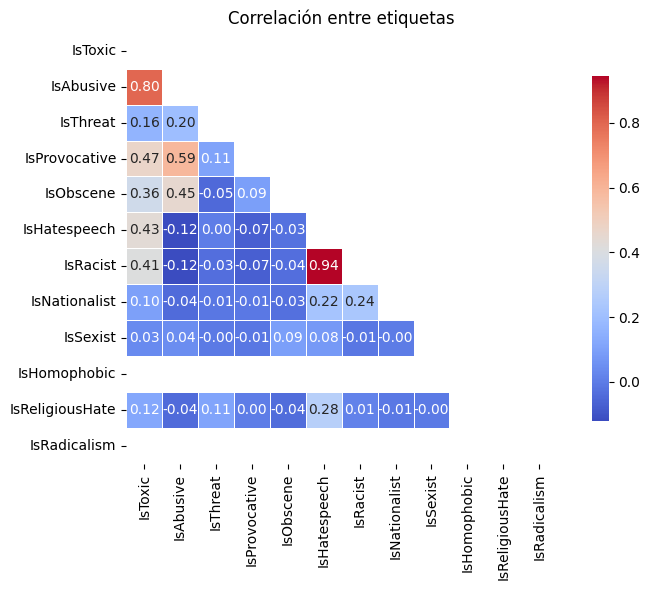

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Calcular matriz de correlación
corr = df[binary_columns].corr()

# Crear máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot del heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, annot=True, cmap="coolwarm", fmt=".2f", square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title("Correlación entre etiquetas")
plt.tight_layout()
plt.show()


Decido borrar las columnas:
- **IsHomophobic:** Porque solo tiene una clase
- **IsRadicalism:** Porque solo tiene una clase
- **IsSexist:** Porque tiene muy poca (0.00 - 0.09) correlación con otras etiquetas

In [43]:
df = df.drop(columns=["IsHomophobic", "IsRadicalism", "IsSexist"])

In [44]:
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsReligiousHate
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False
